# `Romeo` `INVLAPLACE` Demo

This is a short demo illustrating the ability of `Romeo` to compute Inverse Laplace transform of a rather general class of LTI systems (`invlaplace`).

The demo is meant primarily for testing purposes. It also serves as a rather extensive collection of inverse Laplace transforms.

See also http://eqworld.ipmnet.ru/en/auxiliary/aux-inttrans.htm

In [1]:
using Revise

In [2]:
using Plots
using Printf
using SpecialFunctions

In [3]:
using Romeo.LTI

## Common definitions and settings

In [4]:
s = Diff(1)

Diff{Int64}(1)

In [5]:
Δt = 0.001
N = 1000

1000

In [16]:
function ilt_compare(G, g, N, Δt)
    t = 0:Δt:1-Δt
    ga = g.(t)
    ge = invlaplace(G, N, Δt)
    pg = plot(t, ga, label="actual", title="Inverse Laplace transforms")
    plot!(t, ge, linestyle=:dash, label="estimated")
    err = abs.(ga .- ge)
    mse = sqrt(sum(err.[2:end]^2)/length(t))
    pe = plot(t, err, label="abs. error", title="MSE = $(@sprintf("%.2g", mse))")
    plot(pg, pe, layout=grid(2, 1, heights=[0.75, 0.25]))
end

macro ilt_compare()
    :( ilt_compare(G, g, N, Δt) )
end

ErrorException: syntax: missing last argument in "2:" range expression 

## Expressions with rational functions

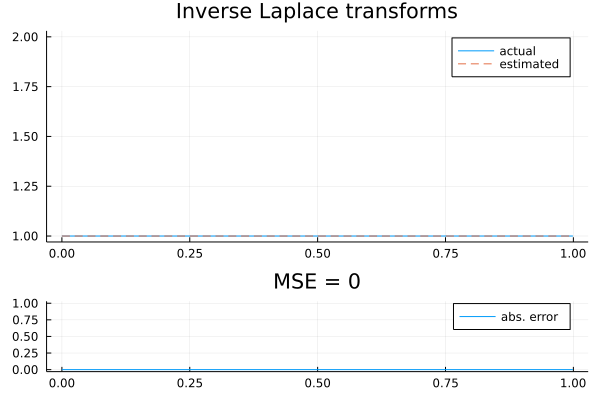

In [17]:
G = 1/s
g = t -> 1

@ilt_compare

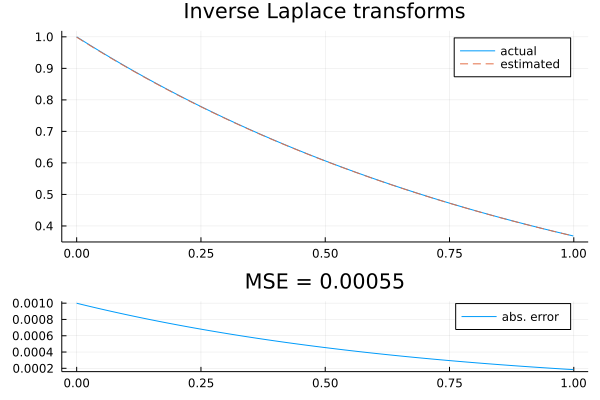

In [18]:
G = 1/(s+1)
g = t -> exp(-t)

@ilt_compare

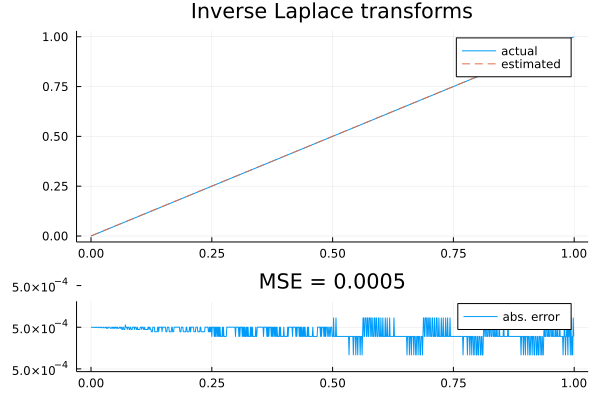

┌ Warning: No strict ticks found
└ @ PlotUtils /home/rapaja/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/rapaja/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/rapaja/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/rapaja/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/rapaja/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/rapaja/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/rapaja/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191


In [19]:
G = 1/s^2
g = t -> t

@ilt_compare

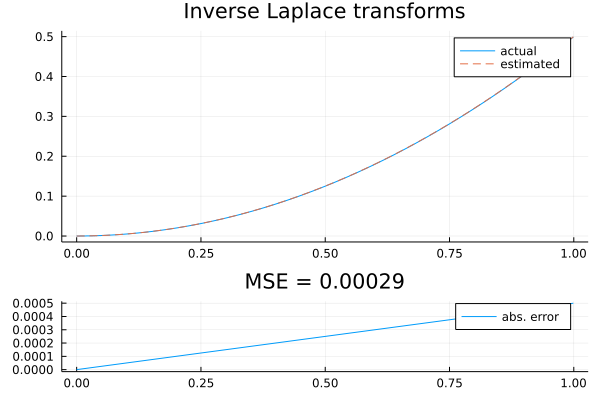

In [20]:
G = 1/s^3
g = t -> 1/2 * t^2

@ilt_compare

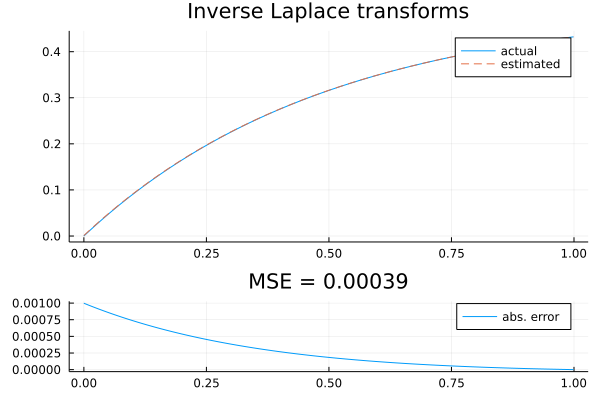

In [21]:
G = 1/s/(s+2)
g = t -> 1/2 * (1 - exp(-2*t))

@ilt_compare

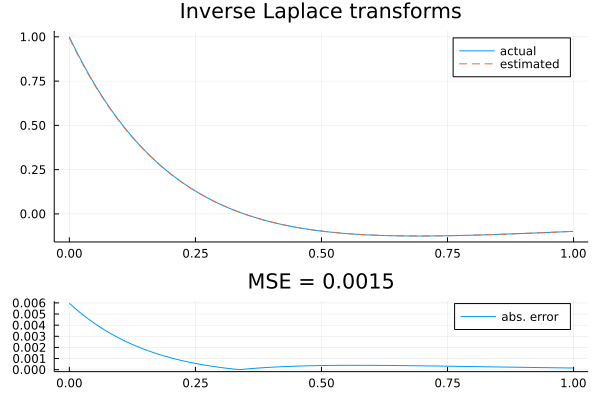

In [24]:
G = s/(s+2)/(s+4)
g = t -> 1/(2-4) * (2*exp(-2*t)- 4*exp(-4*t))

@ilt_compare

## Expressions with Square Root

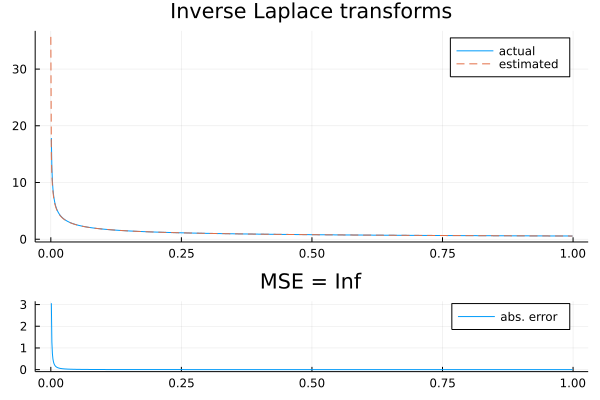

In [25]:
G = 1/sqrt(s)
g = t -> 1/sqrt(π*t)

@ilt_compare

In [26]:
G = 1/sqrt(s+1)
g = t -> 1/sqrt(π*t) * exp(-t)

@ilt_compare

MethodError: MethodError: RationalSystem(::Romeo.LTI.UnitSys, ::PowerSystem{Rational{Int64}}) is ambiguous. Candidates:
  RationalSystem(num::SisoLtiSystem, den::PowerSystem) in Romeo.LTI at /home/rapaja/Documents/GitHub/Romeo.jl/src/lti/_2_lti_systems.jl:174
  RationalSystem(num::Romeo.LTI.UnitSys, den::SisoLtiSystem) in Romeo.LTI at /home/rapaja/Documents/GitHub/Romeo.jl/src/lti/_2_lti_systems.jl:167
Possible fix, define
  RationalSystem(::Romeo.LTI.UnitSys, ::PowerSystem)